In [7]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as tkr
import matplotlib as mpl

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [8]:
insta = pd.read_excel('/Users/hankiho/Downloads/라비림_청소기.xlsx', sheet_name = 'insta')
df = pd.read_excel('/Users/hankiho/Downloads/라비림_청소기.xlsx', sheet_name = 'sales')

In [9]:
def group_buying_graph(amount_df, insta, sales_prd_name, insta_prd_name):

    insta = insta[insta['일자'].notnull()]
    insta['일자'] = insta['일자'].apply(lambda x:x.replace('/','-'))

    d = df[df['orderGoodSimple'] == sales_prd_name]
    q = d.groupby('orderPayDate')['orderPrice'].sum().reset_index(name = 'amt')

    insta['일자'] = insta['일자'].apply(lambda x:x.strip())
    insta = insta[insta['제품명'] == insta_prd_name]
    df_5stage = insta.groupby(['일자','5 stage']).size().reset_index(name = 'cnt').fillna(0)

    max_dates = max(min(insta['일자']), max(insta['일자']), min(q['orderPayDate']), max(d['orderPayDate']))
    min_dates = min(min(insta['일자']), max(insta['일자']), min(q['orderPayDate']), max(d['orderPayDate']))
    dates_df = pd.DataFrame(pd.date_range(min_dates, max_dates), columns = ['orderPayDate'])
    dates_df['orderPayDate'] = dates_df['orderPayDate'].apply(lambda x:x.strftime('%Y-%m-%d'))
    q = pd.merge(dates_df, q, how = 'outer').fillna(0)


    merge_df = pd.merge(q, df_5stage, left_on = 'orderPayDate', right_on = '일자', how = 'outer').fillna(0).drop('일자',1)[['orderPayDate','5 stage','cnt','amt']]

    display(merge_df[merge_df['cnt'] == 0])
    merge_df = merge_df[merge_df['cnt'] != 0]
    
    print('홍보기간: {0}일'.format(merge_df.shape[0]))
    print('피드갯수: {0}개'.format(merge_df['cnt'].sum()))
    print('판매량: {:,}원'.format(merge_df['amt'].sum()))
    top_3_location = ','.join(df['recvAddr1'].apply(lambda x:x.split(' ')[0]).value_counts()[:3].index)
    print ('상위 구매지역(Top_3): {0}'.format(top_3_location))
    
    plt.rcParams["figure.figsize"] = (15, 5)

    color_dct = {'show':'crimson',
                'push':'darksalmon',
                'open':'chartreuse',
                'ing':'dodgerblue',
                'close':'navy'}

    ax1 = pd.pivot_table(data = merge_df,
                index = 'orderPayDate', columns = '5 stage', 
                values = 'cnt').fillna(0).plot.bar(stacked=True, color = color_dct)
    ax1.set_ylabel('인스타그램 피드수')
    ax1.legend(bbox_to_anchor= (1.5, 0.5))

    ax2 = ax1.twinx()
    ax2 = sns.pointplot(data = merge_df, x = 'orderPayDate', y = 'amt', color = 'yellow')
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax2.set_ylabel('판매량')
    plt.xticks(rotation = '90')
    plt.title('공구 플로우 현황 ({0})\n'.format(insta['제품명'].unique()[0]), fontsize = 15)
    plt.tight_layout()
    # plt.savefig('{0}.png'.format(insta_prd))
    plt.show()

,orderPayDate,5 stage,cnt,amt
1,2021-07-07,0,0.0,0.0
3,2021-07-09,0,0.0,0.0
5,2021-07-11,0,0.0,0.0
8,2021-07-14,0,0.0,0.0
17,2021-07-22,0,0.0,0.0


홍보기간: 15일
피드갯수: 42.0개
판매량: 104,976,000.0원
상위 구매지역(Top_3): 경기,서울,대구


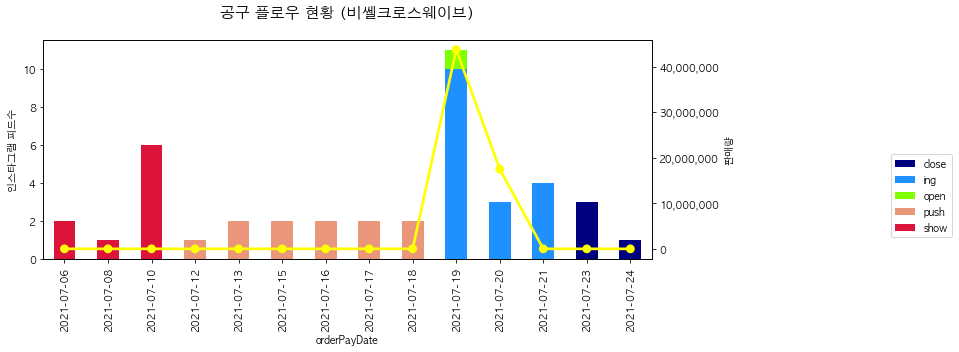

In [10]:
group_buying_graph(df, insta, '비쎌 크로스웨이브 맥스 3.0 2765S', '비쎌크로스웨이브')